In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt

In [2]:
sys.path.append('..')

In [3]:
from postprocess import postprocess_dir

In [4]:
lasso = postprocess_dir(os.environ['SCRATCH'] + '/reprod', exp_type = 'CV_Lasso')
en = postprocess_dir(os.environ['SCRATCH'] + '/reprod', exp_type = 'EN')
uoil = postprocess_dir(os.environ['SCRATCH'] + '/reprod', exp_type = 'UoILasso')
uoien = postprocess_dir(os.environ['SCRATCH'] + '/reprod', exp_type = 'UoIElasticNet')

0.06992697715759277
0.062061309814453125
0.07707834243774414
0.06354141235351562
0.07074546813964844
0.07670807838439941
0.07058453559875488
0.07502889633178711
0.11324644088745117
0.0777425765991211
(40, 34)
0.041217803955078125
0.04195857048034668
0.07123398780822754
0.04048609733581543
0.036917924880981445
0.03982996940612793
0.05662894248962402
0.03874516487121582
0.05719470977783203
0.055829763412475586
(40, 34)
0.06775021553039551
0.06725406646728516
0.04311347007751465
0.03746676445007324
0.03907299041748047
0.06443595886230469
0.08275032043457031
0.04169011116027832
0.046147823333740234
0.041049957275390625
(40, 34)
0.038158416748046875
0.04918336868286133
0.061177730560302734
0.0587620735168457
0.05910539627075195
0.038155555725097656
0.04458212852478027
0.032244205474853516
0.041525840759277344
0.0403141975402832
(40, 34)


In [13]:
lasso.iloc[0]['cov_params']

{'correlation': 0, 'block_size': 6, 'L': 1, 't': 0}

In [14]:
import pandas as pd

In [15]:
# Replace the dictionary cov_params with separate entries so they 
def unpack_cov_params(df):
    block_sizes = [df.iloc[i]['cov_params']['block_size'] for i in range(df.shape[0])] 
    correlations = [df.iloc[i]['cov_params']['correlation'] for i in range(df.shape[0])] 
    L = [df.iloc[i]['cov_params']['L'] for i in range(df.shape[0])] 
    t = [df.iloc[i]['cov_params']['t'] for i in range(df.shape[0])] 

    df['block_size'] = pd.Series(block_sizes, index=df.index)
    df['correlation'] = pd.Series(correlations, index = df.index)
    df['L'] = pd.Series(L, index = df.index)
    df['t'] = pd.Series(t, index = df.index)
    
    return df


In [17]:
lasso = unpack_cov_params(lasso)
en = unpack_cov_params(en)
uoil = unpack_cov_params(uoil)
uoien = unpack_cov_params(uoien)

In [28]:
lasso_.iloc[0]['r2']

0.6287193944208628

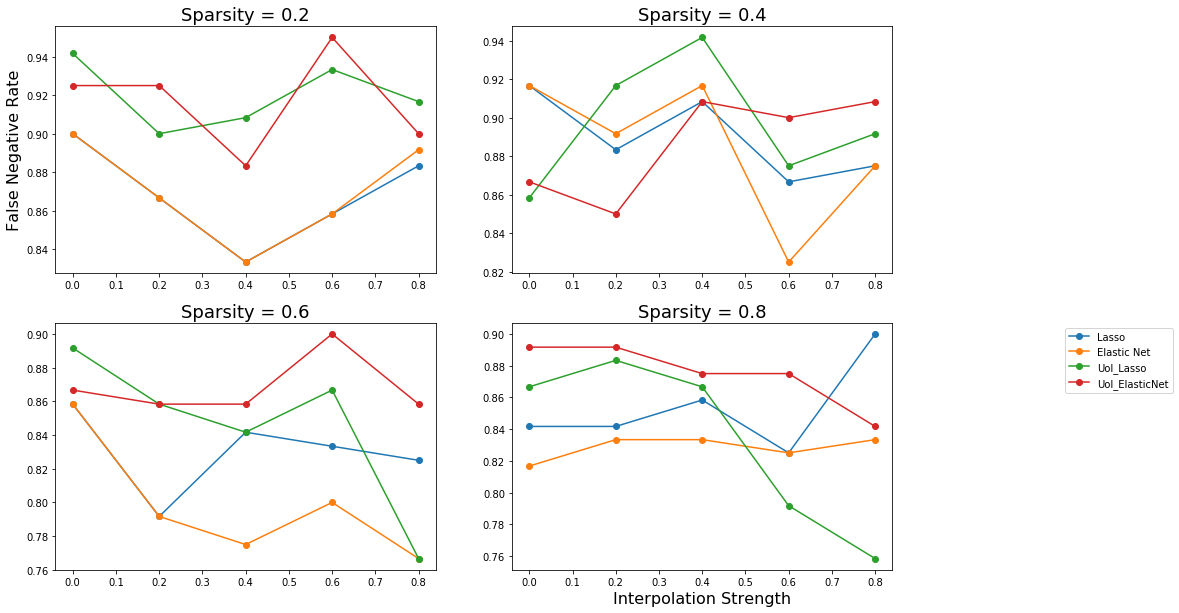

In [31]:
sparsity = [0.2, 0.4, 0.6, 0.8]
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
for i, s in enumerate(sparsity):
        
    lasso_ = lasso.loc[(lasso['sparsity'] == s) & (lasso['block_size'] == 6)]
    en_ = en.loc[(en['sparsity'] == s) & (en['block_size'] == 6)]
    uoil_ = uoil.loc[(uoil['sparsity'] == s) & (uoil['block_size'] == 6)]
    uoien_ = uoien.loc[(uoien['sparsity'] == s) & (uoien['sparsity'] == s)]
    
    # order by covariance
    corr_order = np.argsort(lasso_['correlation'].values)
    correlation = lasso_['correlation'].values[corr_order]
    a = ax[np.unravel_index(i, (2, 2))]
    a.plot(correlation, lasso_['sa'].values[corr_order], '-o')
    a.plot(correlation, en_['sa'].values[corr_order], '-o')
    a.plot(correlation, uoil_['sa'].values[corr_order], '-o')
    a.plot(correlation, uoien_['sa'].values[corr_order], '-o')
    
ax[np.unravel_index(0, (2, 2))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 2))].set_ylabel('False Negative Rate', fontsize=16)
ax[np.unravel_index(1, (2, 2))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 2))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 2))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 2))].set_xlabel('Interpolation Strength', fontsize=16)
ax[np.unravel_index(3, (2, 2))].legend(['Lasso', 'Elastic Net', 'UoI_Lasso', 'UoI_ElasticNet'], loc = 'upper right', bbox_to_anchor=(1.75, 1))
#lt.savefig('../figs/revisions/interp_fn.png')